In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vortex_tools import *

In [5]:
# generate a mesh
N = 100
x_start, x_end = -2.0, 2.0
y_start, y_end = -2.0, 2.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

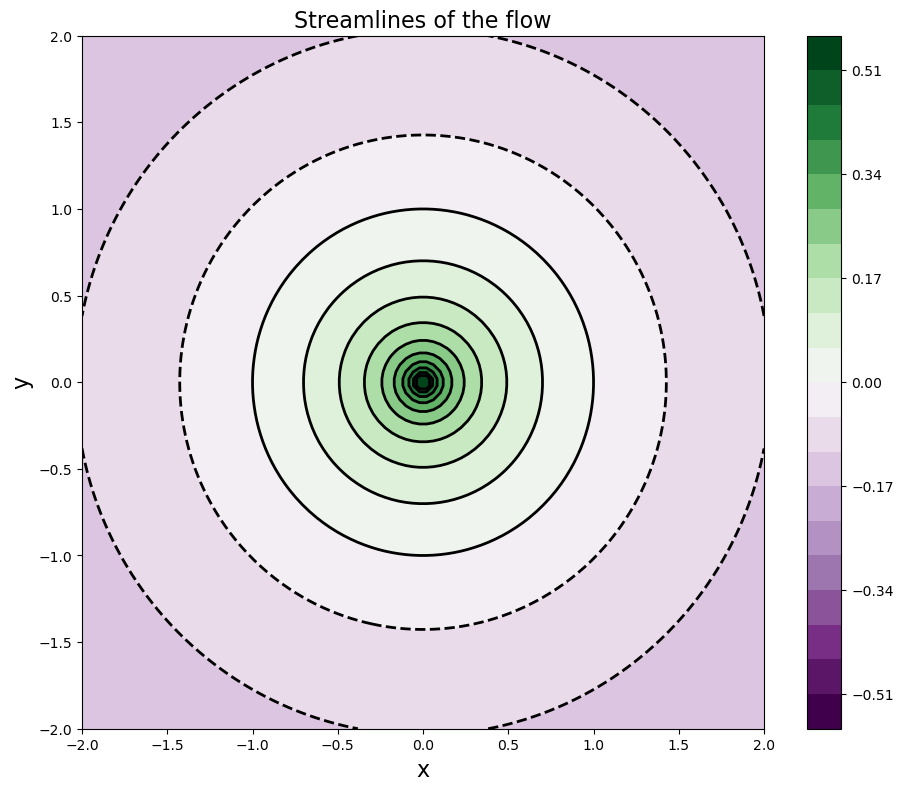

In [6]:
# generate a vortex at the origin
x0, y0 = 0.0, 0.0
gamma = 1.0
w = generate_vortex(X, Y, x0, y0, gamma)

# plot the streamlines
plot_streamlines(w, X, Y)

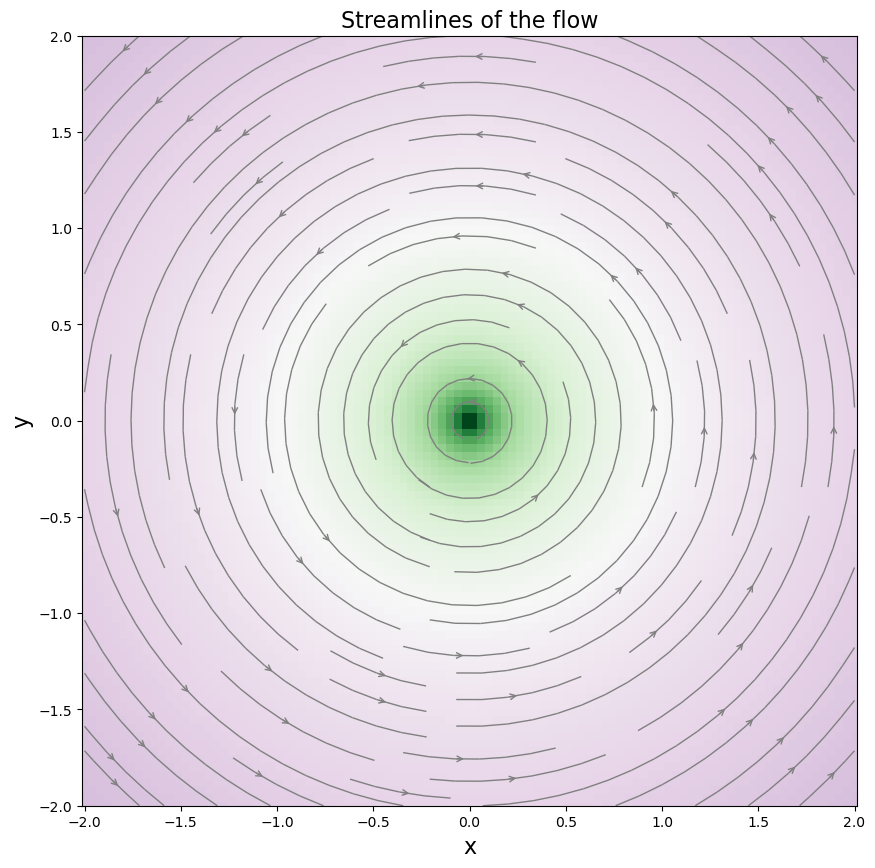

In [11]:
u, v = velocity_field(w)

# plot the velocity field
plot_velocities(w, X, Y)

In [33]:
# add noise to the potential
noise = np.random.normal(0.0, 0.003, (N, N)) + 1j*np.random.normal(0.0, 0.003, (N, N))
w_noisy = w + np.log(1.0 + noise)

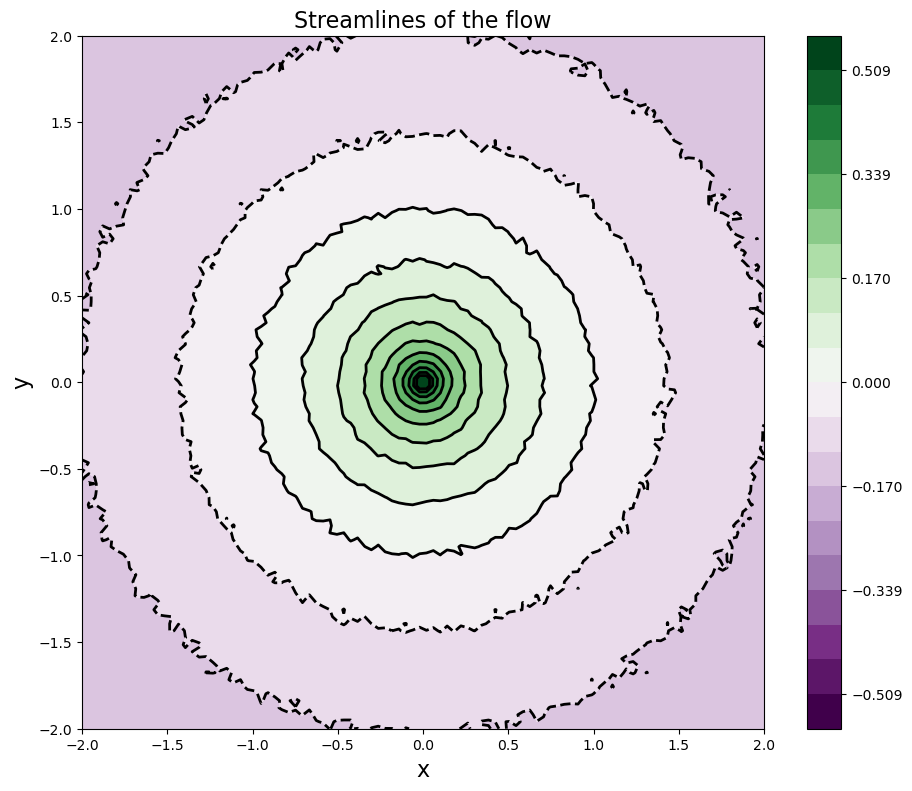

In [34]:
# plot the streamlines
plot_streamlines(w_noisy, X, Y)

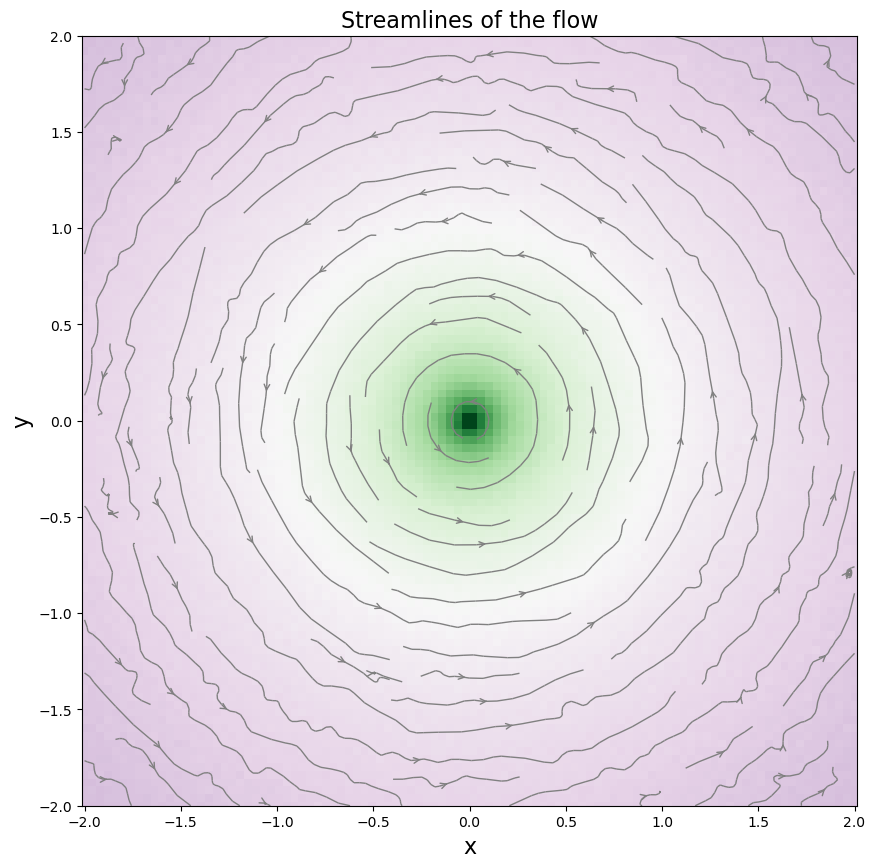

In [35]:
plot_velocities(w_noisy, X, Y)

In [ ]:
u_noisy, v_noisy = velocity_field(w_noisy)

In [36]:
from autograd import jacobian
from scipy.integrate import quad

In [ ]:
# import autograd.numpy as autonp

def F(X):
    x, y = X
    return -y, -x * y

def r(t):
    return np.array([-np.sin(t), np.cos(t)])

drdt = jacobian(r)

def integrand(t):
    return F(r(t)) @ drdt(t)

I, e = quad(integrand, 0.0, np.pi / 2)
print(f'The integral is {I:1.4f}.')

In [ ]:
def find_vortex(w):
    """
    Finds the location and strength of a vortex in a velocity field.
    """
    